In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

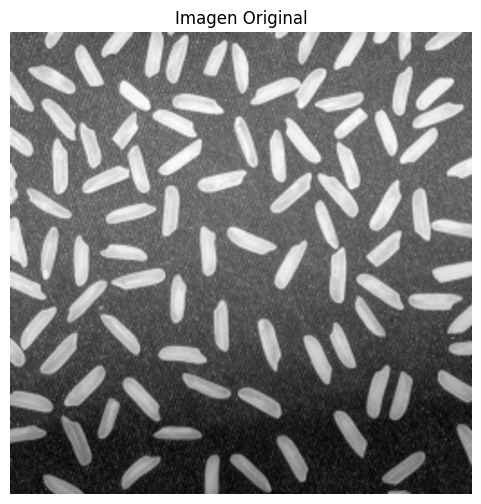

In [51]:
img = cv2.imread('./rice.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("No se encontró 'rice.jpg'. Asegúrate de que el archivo está en el directorio de trabajo.")

plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.show()

In [ ]:
blurred = cv2.GaussianBlur(img, (5,5), 0)

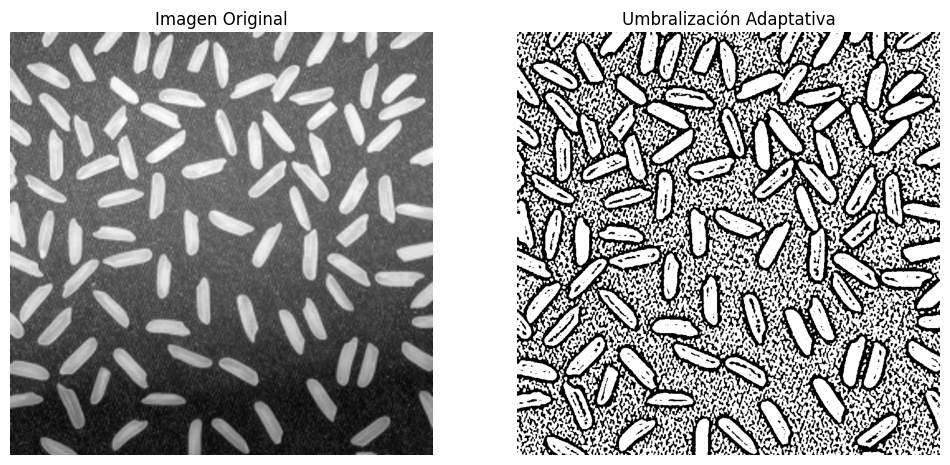

In [53]:
adaptive = cv2.adaptiveThreshold(
    blurred, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    21,   # blockSize
    2     # C
)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(adaptive, cmap='gray')
plt.title('Umbralización Adaptativa')
plt.axis('off')

plt.show()

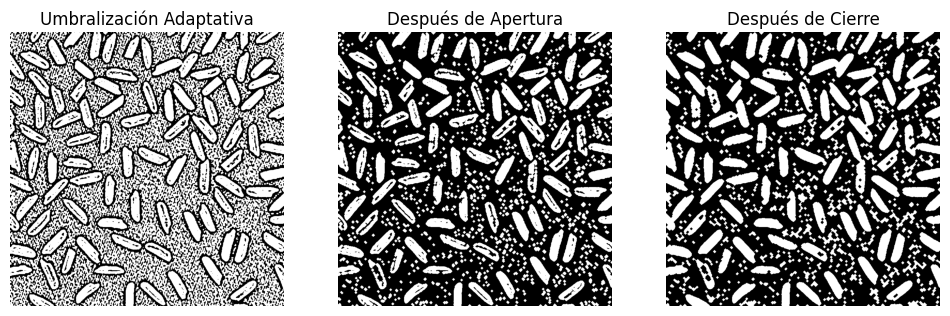

In [57]:
# Definir un elemento estructurante (aquí usamos una elipse 3x3)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

# Aplicar apertura para eliminar pequeños ruidos
opening = cv2.morphologyEx(adaptive, cv2.MORPH_OPEN, kernel, iterations=4)

# Aplicar cierre para rellenar huecos dentro de los objetos (opcional)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=4)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(adaptive, cmap='gray')
plt.title('Umbralización Adaptativa')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(opening, cmap='gray')
plt.title('Después de Apertura')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(closing, cmap='gray')
plt.title('Después de Cierre')
plt.axis('off')

plt.show()



Número de granos de arroz detectados: 514


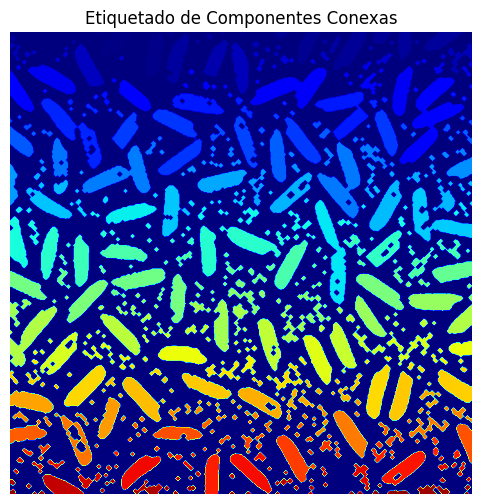

In [55]:
num_labels, labels = cv2.connectedComponents(closing)

num_grains = num_labels - 1
print("Número de granos de arroz detectados:", num_grains)

plt.figure(figsize=(6, 6))
plt.imshow(labels, cmap='jet')
plt.title('Etiquetado de Componentes Conexas')
plt.axis('off')
plt.show()
